#**CV MINI PROJECT**

**NAME:** Maithili Lokhande

**BATCH:** B1

**ROLL NO:** 7

#Task 1: Background Replacement








Choose a background:
1: Cafe.png
2: Beach.png
3: Mountains.png
4: Office background.jpg
5: Plain color background.png
Enter the number of your chosen background: 4


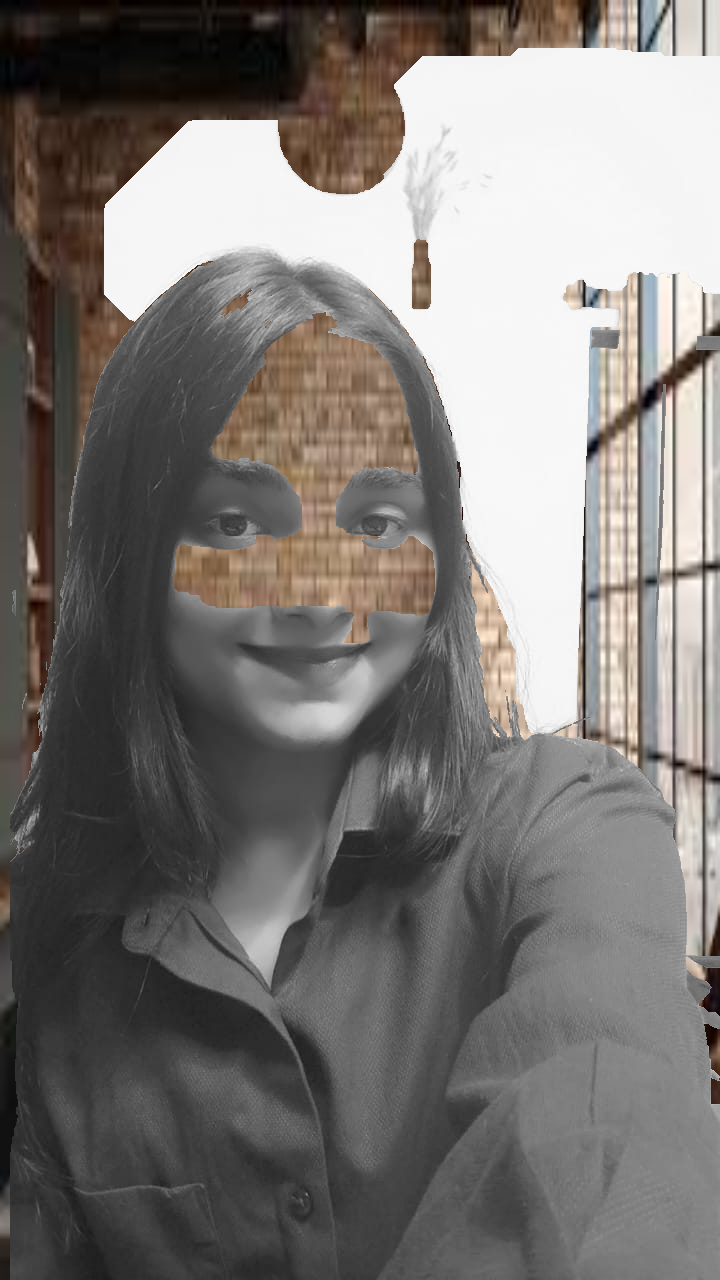

In [11]:
import cv2
import numpy as np

def change_background(image_path, background_paths):
    # Load the image
    img = cv2.imread(image_path)
    mask = np.zeros(img.shape[:2], np.uint8)
    # Define the background and foreground models
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    # Define the rectangle around the object
    rect = (10, 10, img.shape[1] - 10, img.shape[0] - 10)
    # Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    img_foreground = img * mask2[:, :, np.newaxis]
    print("Choose a background:")
    for i, path in enumerate(background_paths):
        print(f"{i + 1}: {path}")
    choice = int(input("Enter the number of your chosen background: ")) - 1
    background = cv2.imread(background_paths[choice])
    background = cv2.resize(background, (img.shape[1], img.shape[0]))
    final_img = background * (1 - mask2[:, :, np.newaxis]) + img_foreground
    from google.colab.patches import cv2_imshow
    cv2_imshow(final_img.astype(np.uint8))
background_options = ['Cafe.png', 'Beach.png', 'Mountains.png', 'Office background.jpg', 'Plain color background.png']
change_background('me.jpeg', background_options)

In [19]:
!pip install rembg
!pip install rembg onnxruntime onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.9 MB/s eta 0:00:00


Choose a background:
1: Cafe.png
2: Beach.png
3: Mountains.png
4: Office background.jpg
5: Plain color background.png
Enter the number of your chosen background: 4


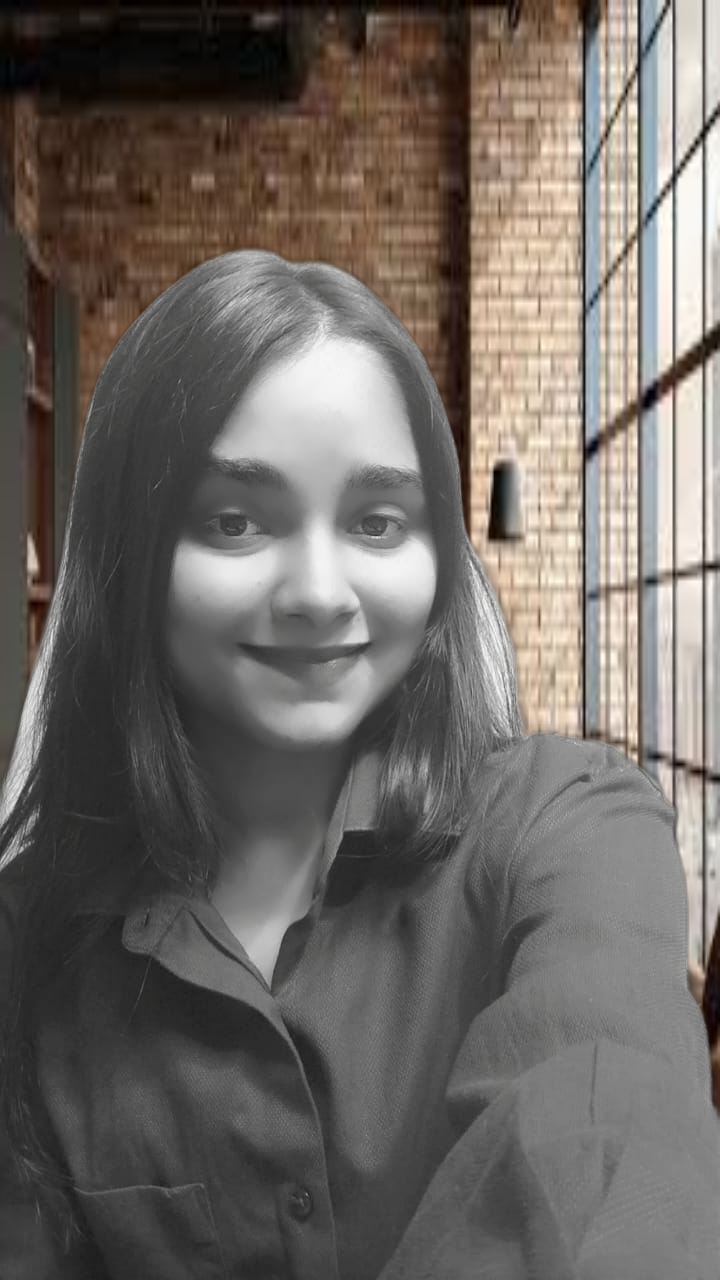

In [24]:
import cv2
import numpy as np
from rembg import remove
from PIL import Image
from google.colab.patches import cv2_imshow
def change_background(image_path, background_paths):
    foreground = Image.open(image_path).convert("RGBA")
    foreground = remove(foreground) #Remove background
    foreground = np.array(foreground)
    alpha_channel = foreground[:, :, 3] / 255.0
    #background options
    print("Choose a background:")
    for i, path in enumerate(background_paths):
        print(f"{i + 1}: {path}")
    try:
        choice = int(input("Enter the number of your chosen background: ")) - 1
        if choice < 0 or choice >= len(background_paths):
            raise ValueError("Invalid choice. Exiting.")
    except ValueError as e:
        print(e)
        return
    background = cv2.imread(background_paths[choice])
    if background is None:
        print("Error: Selected background image not found.")
        return
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)  # Convert to RGB
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))
    background = background.astype(float) / 255.0
    foreground_rgb = foreground[:, :, :3].astype(float) / 255.0
    blended = (foreground_rgb * alpha_channel[:, :, None]) + (background * (1 - alpha_channel[:, :, None]))
    blended = (blended * 255).astype(np.uint8)
    cv2_imshow(cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
background_options = ['Cafe.png', 'Beach.png', 'Mountains.png', 'Office background.jpg', 'Plain color background.png']
change_background('me.jpeg', background_options)



#**CONCLUSION of Task 1**

Initially, I used GrabCut for background removal, but it required manual tuning and struggled with complex edges, often leaving artifacts. To improve accuracy and automation, I switched to rembg, which leverages deep learning for cleaner segmentation. By fine-tuning parameters and applying alpha blending, I achieved smoother integration between the subject and the new background, eliminating harsh edges and improving realism.

Additionally, I have also developed CleatCutAI, a project inspired by Google Meet’s virtual background feature. It allows users to upload videos and change backgrounds dynamically, ensuring high-quality edge detection and seamless blending.

#Task 2: Implement the SIFT algorithm to detect and match key points between two images.


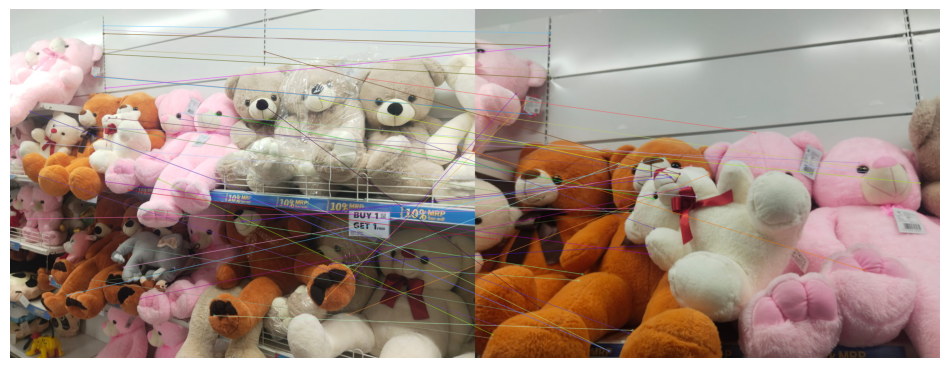

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread('image_1.jpeg')
img2 = cv2.imread('image_2.jpeg')
# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#sift
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
#Use BFMatcher to match
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
#Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)
# Draw top 50 matches (on color images)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


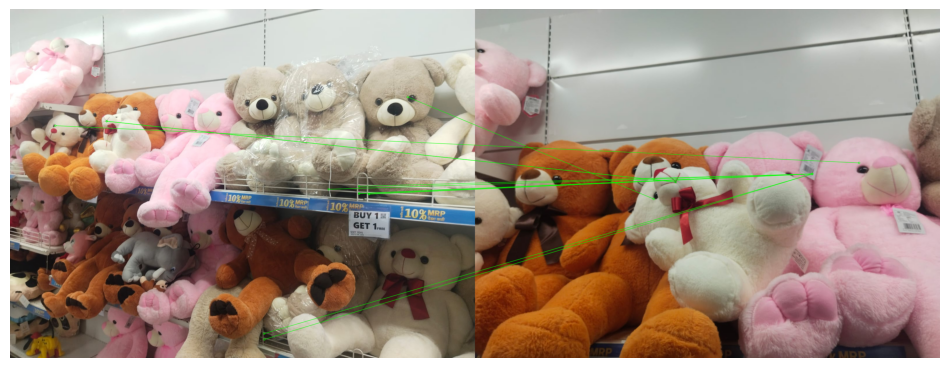

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread('image_1.jpeg')
img2 = cv2.imread('image_2.jpeg')
# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#sift
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
# Use FLANN Matcher for better performance
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
#find matches using KNN
matches = flann.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:  # Lowe’s ratio test
        good_matches.append(m)
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    matchesMask = None
#Draw only inliers
draw_params = dict(matchColor=(0, 255, 0),#Green for correct matches
                   singlePointColor=None,
                   matchesMask=matchesMask,
                   flags=2)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


#**CONCLUSION of Task 2**

The updated approach enhances feature matching by replacing the brute-force method with FLANN, making it faster and more efficient. It also applies Lowe’s Ratio Test to filter out weak matches, ensuring only strong feature correspondences are retained. Additionally, homography estimation with RANSAC helps eliminate outliers, improving the reliability of detected matches. As a result, the modified code produces more accurate and visually meaningful feature matches while optimizing performance, making it ideal for object recognition and image alignment tasks.










#Task 3: Implement the Harris corner detector to find and visualize corners in a grayscale image.

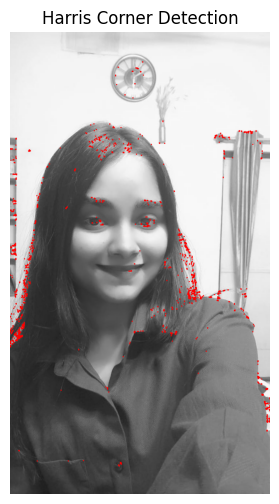

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#grayscale
img = cv2.imread('me.jpeg', cv2.IMREAD_GRAYSCALE)
#convert to float32 for Harris corner detection
img_float = np.float32(img)
#apply Harris Corner Detector
dst = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.04)
#dilation to make corners more visible
dst = cv2.dilate(dst, None)
corner_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
corner_img[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Harris Corner Detection")
plt.show()


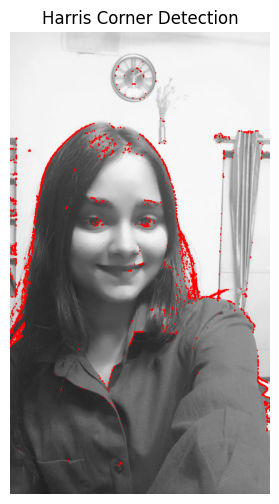

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#grayscale
img = cv2.imread('me.jpeg', cv2.IMREAD_GRAYSCALE)
#convert to float32 for Harris corner detection
img_float = np.float32(img)
#apply Harris Corner Detector
dst = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.0001)
#dilation to make corners more visible
dst = cv2.dilate(dst, None)
corner_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
corner_img[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Harris Corner Detection")
plt.show()


#**CONCLUSION of Task 3**

When I changed the value of k in the Harris Corner Detector, I noticed significant differences in the corner detection results. With a higher k value (e.g., 0.1), fewer corners were detected, and only the most prominent ones were highlighted. However, when I reduced k to a very small value (e.g., 0.0001), almost the entire image was marked with detected points, including many false corners. This shows that k plays a crucial role in balancing sensitivity—too high, and important corners may be missed; too low, and the detector picks up unnecessary noise.

One real-world use of the Harris Corner Detector is in motion tracking and object recognition, where detecting stable corner points helps track objects in videos, such as in surveillance systems and autonomous vehicles